# build the site docs

building documentation with `nbconvert` and dataframes.

In [1]:
    import tonyfast.utils, pandas, json, nbconvert, nbformat, operator, bs4, anyio, pathlib, re
    __import__("nest_asyncio").apply()

configure the accessible exporter for our notebooks

In [2]:
    exporter = nbconvert.get_exporter("a11y")(
        exclude_input_prompt=True, 
        include_sa11y=False,
        exclude_output_prompt=True,
        hide_anchor_links=True,
        include_settings=True
    )

    _, resources = exporter.from_notebook_node(nbformat.v4.new_notebook(cells=[]))    
    ours, theirs = pandas.Series().template.environment, exporter.environment
    ours.loader = theirs.loader
    ours.filters.update({**theirs.filters, **ours.filters})

    ours.globals.update({**theirs.globals, **ours.globals})

    async def from_notebook_node(nb, resources=None, exporter=exporter):
        return exporter.from_notebook_node(nb, resources=resources)[0]

load in all the notebooks

In [3]:
%%
load in all the notebooks

find all the notebooks resembling a post.
we are skipping the work needing to be done on the indexes and readmes.
indexes and readmes use different exporter configurations than content notebooks.
    

    df = await pandas.Index(["tonyfast"]).apath().apath.rglob("[0-9][0-9][0-9][0-9]-*.ipynb")

remove checkpoint files.
    
    df = df[~df.astype(str).str.contains("checkpoint")].pipe(pandas.Index).rename("file")

extract the date from the title. this can later be enriched with git information

    TITLE = "(?P<year>[0-9]{4})-(?P<month>[0-9]{2})-(?P<day>[0-9]{1,2})-(?P<slug>.+)"
    df = df.apath.stem.str.extract(TITLE).set_index(df).dropna(how="all")
    df["date"] = pandas.to_datetime(df.year +"-"+ df.month +"-"+ df.day)
    df = df.sort_values("date", ascending=False)

read in all the notebooks

    df = (await df.index.apath.read_text()).apply(json.loads).rename("nb").apply(nbformat.from_dict).pipe(df.join).head(10)
    df


load in all the notebooks

find all the notebooks resembling a post.
we are skipping the work needing to be done on the indexes and readmes.
indexes and readmes use different exporter configurations than content notebooks.
    

    df = await pandas.Index(["tonyfast"]).apath().apath.rglob("[0-9][0-9][0-9][0-9]-*.ipynb")

remove checkpoint files.
    
    df = df[~df.astype(str).str.contains("checkpoint")].pipe(pandas.Index).rename("file")

extract the date from the title. this can later be enriched with git information

    TITLE = "(?P<year>[0-9]{4})-(?P<month>[0-9]{2})-(?P<day>[0-9]{1,2})-(?P<slug>.+)"
    df = df.apath.stem.str.extract(TITLE).set_index(df).dropna(how="all")
    df["date"] = pandas.to_datetime(df.year +"-"+ df.month +"-"+ df.day)
    df = df.sort_values("date", ascending=False)

read in all the notebooks

    df = (await df.index.apath.read_text()).apply(json.loads).rename("nb").apply(nbformat.from_dict).pipe(df.join).head(10)
    df


year month day  \
file                                                                 
tonyfast/xxiv/2024-02-21-build-docs-pd.ipynb        2024    02  21   
tonyfast/xxiv/2024-02-20-multiindex-html.ipynb      2024    02  20   
tonyfast/xxiv/2024-02-15-pandas-table-names.ipynb   2024    02  15   
tonyfast/xxiv/2024-02-05-aiohttp-pandas-accesso...  2024    02  05   
tonyfast/xxiv/2024-01-25-mast-a11y-notebooks.ipynb  2024    01  25   
tonyfast/xxiv/2024-01-20-colgroup-schema.ipynb      2024    01  20   
tonyfast/xxiv/2024-01-05-docx-to-data.ipynb         2024    01  05   
tonyfast/xxiii/2024-01-05-docx-to-data.ipynb        2024    01  05   
tonyfast/xxiii/2023-12-20-interactive-html-vali...  2023    12  20   
tonyfast/xxiii/2023-12-18-ugghhh.ipynb              2023    12  18   

                                                                           slug  \
file                                                                              
tonyfast/xxiv/2024-02-21-build-docs-pd.ipynb                      build-docs-pd   
tonyfast/xxiv/2024-02-20-multiindex-html.ipynb                  multiindex-html   
tonyfast/xxiv/2024-02-15-pandas-table-names.ipynb            pandas-table-names   
tonyfast/xxiv/2024-02-05-aiohttp-pandas-accesso...      aiohttp-pandas-accessor   
tonyfast/xxiv/2024-01-25-mast-a11y-notebooks.ipynb          mast-a11y-notebooks   
tonyfast/xxiv/2024-01-20-colgroup-schema.ipynb                  colgroup-schema   
tonyfast/xxiv/2024-01-05-docx-to-data.ipynb                        docx-to-data   
tonyfast/xxiii/2024-01-05-docx-to-data.ipynb                       docx-to-data   
tonyfast/xxiii/2023-12-20-interactive-html-vali...  interactive-html-validation   
tonyfast/xxiii/2023-12-18-ugghhh.ipynb                                   ugghhh   

                                                         date  \
file                                                            
tonyfast/xxiv/2024-02-21-build-docs-pd.ipynb       2024-02-21   
tonyfast/xxiv/2024-02-20-multiindex-html.ipynb     2024-02-20   
tonyfast/xxiv/2024-02-15-pandas-table-names.ipynb  2024-02-15   
tonyfast/xxiv/2024-02-05-aiohttp-pandas-accesso... 2024-02-05   
tonyfast/xxiv/2024-01-25-mast-a11y-notebooks.ipynb 2024-01-25   
tonyfast/xxiv/2024-01-20-colgroup-schema.ipynb     2024-01-20   
tonyfast/xxiv/2024-01-05-docx-to-data.ipynb        2024-01-05   
tonyfast/xxiii/2024-01-05-docx-to-data.ipynb       2024-01-05   
tonyfast/xxiii/2023-12-20-interactive-html-vali... 2023-12-20   
tonyfast/xxiii/2023-12-18-ugghhh.ipynb             2023-12-18   

                                                                                                   nb  
file                                                                                                   
tonyfast/xxiv/2024-02-21-build-docs-pd.ipynb        {'cells': [{'cell_type': 'markdown', 'id': '55...  
tonyfast/xxiv/2024-02-20-multiindex-html.ipynb      {'cells': [{'cell_type': 'markdown', 'id': 'd0...  
tonyfast/xxiv/2024-02-15-pandas-table-names.ipynb   {'cells': [{'cell_type': 'markdown', 'id': '98...  
tonyfast/xxiv/2024-02-05-aiohttp-pandas-accesso...  {'cells': [{'cell_type': 'markdown', 'id': '44...  
tonyfast/xxiv/2024-01-25-mast-a11y-notebooks.ipynb  {'cells': [{'attachments': {}, 'cell_type': 'm...  
tonyfast/xxiv/2024-01-20-colgroup-schema.ipynb      {'cells': [{'cell_type': 'markdown', 'id': '8c...  
tonyfast/xxiv/2024-01-05-docx-to-data.ipynb         {'cells': [{'cell_type': 'markdown', 'id': '2a...  
tonyfast/xxiii/2024-01-05-docx-to-data.ipynb        {'cells': [{'cell_type': 'markdown', 'id': '2a...  
tonyfast/xxiii/2023-12-20-interactive-html-vali...  {'cells': [{'cell_type': 'markdown', 'id': 'a2...  
tonyfast/xxiii/2023-12-18-ugghhh.ipynb              {'cells': [{'cell_type': 'markdown', 'id': '1a...

the notebooks require preparation before they can transform to html

In [4]:
    is_midgy = re.compile("^\%\%[\s+,(pidgy),(midgy)]")

    def prepare_cell(cell):
        """make inplace changes to the notebook that carried through the publishing process"""
        cell.source = "".join(cell.source)
        if is_midgy.match(cell.source):
            cell.metadata.setdefault("jupyter", {})["source_hidden"] = True
        for out in cell.get("outputs", ""):
            for k, v in out.get("data", {}).items():  k.startswith("text") and out["data"].__setitem__(k, "".join(v))
            if "text" in out: out.text = "".join(out.text)
        return cell

In [5]:
    cells = df.nb.itemgetter("cells").enumerate("index").apply(prepare_cell).series()

In [6]:
    def render_markdown_output(output):
        if "data" in output:
            if "text/markdown" in output["data"]:
                md = exporter.environment.globals["markdown"](output["data"]["text/markdown"])
                output["data"]["text/html"] = md
                return md
                

In [7]:
    outputs = cells.outputs.dropna().enumerate("output").dropna()
    outputs.apply(render_markdown_output);
    markdowns = cells[cells.cell_type.eq("markdown")].apply(
        lambda s: operator.setitem(
            s.metadata.setdefault("data", {}),
            "text/html",
            html := exporter.environment.globals["markdown"](s.source),
        )
        or html,
        axis=1,
    ).to_frame("html").assign(output=-1).set_index("output", append=True)

In [8]:
%%
create intermediate representations of markdown. when we handle this work before templating we can use partial information from the outcome
to build the table of contents and relative links.

    html = pandas.concat(
        [
            markdowns,
            outputs.itemgetter("data").dropna().itemgetter("text/html").dropna().to_frame("html"),
            
        ]
    ).sort_index()

    html["soup"] = html.html.apply(bs4.BeautifulSoup, features="lxml")

extract the headings from each cell

    html["h"] = html.soup.methodcaller("select", "h1,h2,h3,h4,h5,h6")
    h = html.h.enumerate("h").dropna()

expand the headings into features on the dataframe

    h = h.to_frame("h").assign(
        level=h.attrgetter("name").str.lstrip("h").astype(int),
        string=h.attrgetter("string"),
        id=h.attrgetter("attrs").itemgetter("id")
    ); h.head()


create intermediate representations of markdown. when we handle this work before templating we can use partial information from the outcome
to build the table of contents and relative links.

    html = pandas.concat(
        [
            markdowns,
            outputs.itemgetter("data").dropna().itemgetter("text/html").dropna().to_frame("html"),
            
        ]
    ).sort_index()

    html["soup"] = html.html.apply(bs4.BeautifulSoup, features="lxml")

extract the headings from each cell

    html["h"] = html.soup.methodcaller("select", "h1,h2,h3,h4,h5,h6")
    h = html.h.enumerate("h").dropna()

expand the headings into features on the dataframe

    h = h.to_frame("h").assign(
        level=h.attrgetter("name").str.lstrip("h").astype(int),
        string=h.attrgetter("string"),
        id=h.attrgetter("attrs").itemgetter("id")
    ); h.head()


h  \
file                                   index output h                                                      
tonyfast/xxiii/2023-12-18-ugghhh.ipynb 0     -1     0  [slicing and dicing accessibility violations w...   
                                       8     -1     0                              [unexpected failures]   
                                       11    -1     0                                [expected failures]   
                                       13    -1     0                                [unexpected passes]   
                                       14    -1     0                   [unexpected passes and failures]   

                                                       level  \
file                                   index output h          
tonyfast/xxiii/2023-12-18-ugghhh.ipynb 0     -1     0      1   
                                       8     -1     0      2   
                                       11    -1     0      2   
                                       13    -1     0      2   
                                       14    -1     0      2   

                                                                                                  string  \
file                                   index output h                                                      
tonyfast/xxiii/2023-12-18-ugghhh.ipynb 0     -1     0  slicing and dicing accessibility violations wi...   
                                       8     -1     0                                unexpected failures   
                                       11    -1     0                                  expected failures   
                                       13    -1     0                                  unexpected passes   
                                       14    -1     0                     unexpected passes and failures   

                                                                                                      id  
file                                   index output h                                                     
tonyfast/xxiii/2023-12-18-ugghhh.ipynb 0     -1     0  slicing-and-dicing-accessibility-violations-wi...  
                                       8     -1     0                                unexpected-failures  
                                       11    -1     0                                  expected-failures  
                                       13    -1     0                                  unexpected-passes  
                                       14    -1     0                     unexpected-passes-and-failures

In [9]:
%%
extract the document title from the headings. _we should probably extract a description too. 
adding description to the meta is good for accessibility when choosing tabs.

    df = df.assign(title=h.groupby(h.index.get_level_values("file")).apply(
        lambda s: s.sort_values("level").string.iloc[0]
    ).rename("title"))


extract the document title from the headings. _we should probably extract a description too. 
adding description to the meta is good for accessibility when choosing tabs.

    df = df.assign(title=h.groupby(h.index.get_level_values("file")).apply(
        lambda s: s.sort_values("level").string.iloc[0]
    ).rename("title"))


In [10]:
%%

    def make_toc(df):
make a table of contents `details > nav > ol` for a dataframe
        
        toc = bs4.BeautifulSoup(features="lxml")
        toc.append(nav := toc.new_tag("nav"))
        nav.append(ol := toc.new_tag("ol"))
        last_level = 1
        for i, row in df.iterrows():
            if row.level > last_level:
                for i in range(last_level, row.level):
                    last_level = i + 1
                    ol.append(li := toc.new_tag("li"))
                    li.append(ol := toc.new_tag("ol"))
            else:
                for i in range(row.level, last_level):
                    ol = ol.parent.parent
            ol.append(li := toc.new_tag("li"))
            li.append( a:= toc.new_tag("a"))
            a.append(row.string)
            a.attrs.update(href=F"#{row.id}")
        return toc

generate the table of contents for each file we have indexed

    df = df.assign(toc=h.groupby(h.index.get_level_values("file")).apply(make_toc).apply(str))

In [11]:
%%
determine the location of the html version of the file.

    target = anyio.Path("outputs")
    df = df.assign(target=df.index.map(target.__truediv__).apath.with_suffix(".html").values)


determine the location of the html version of the file.

    target = anyio.Path("outputs")
    df = df.assign(target=df.index.map(target.__truediv__).apath.with_suffix(".html").values)


In [12]:
    df = df.assign(**pandas.DataFrame([
            [None] + df.index.values[:-1].tolist(), df.index.values, df.index.values[1:].tolist() + [None]
    ], index=["prev", "file", "next"]).T.set_index("file"))

In [13]:
    def relative_path(source, target):
        """compute a relative path from source to target"""
        if target:
            common = []
            source = pathlib.Path(source).absolute()
            target = pathlib.Path(target).absolute()
            for i, parent in enumerate(source.parents):
                if parent == target.parents[i]:
                    common.append(parent)
            return type(source)(*[".."]*(len(source.parents)-len(common)), *target.parts[len(common):])

In [14]:
%%
generate the footer that contains the previous and next links 

    df = df.assign(
        footer = df.apply(
                lambda s: (s.prev and F"""<a href="{relative_path(s.target, df.loc[s.prev].target)}" rel="prev><span aria-hidden="true">&lt;</span>{df.loc[s.prev].title}</a><br/>""" or "")
                + (s.next and F"""<a href="{relative_path(s.target, df.loc[s.next].target)}" rel="next">{df.loc[s.next].title} <span aria-hidden="true">&gt;</span></a><br/>""" or ""),
                axis=1
        )
    )


generate the footer that contains the previous and next links 

    df = df.assign(
        footer = df.apply(
                lambda s: (s.prev and F"""<a href="{relative_path(s.target, df.loc[s.prev].target)}" rel="prev><span aria-hidden="true">&lt;</span>{df.loc[s.prev].title}</a><br/>""" or "")
                + (s.next and F"""<a href="{relative_path(s.target, df.loc[s.next].target)}" rel="next">{df.loc[s.next].title} <span aria-hidden="true">&gt;</span></a><br/>""" or ""),
                axis=1
        )
    )


In [15]:
    df = df.assign(
        header = df.apply(
        lambda s: "<details><summary>site navigation</summary><nav><ol>%s</ol></nav></details>"% "".join(
            F"""<li><a href="{relative_path(s.target, t.target)}">{t.title}</a></li>"""
            for i, t in df.iterrows()
        ), axis=1
    ))


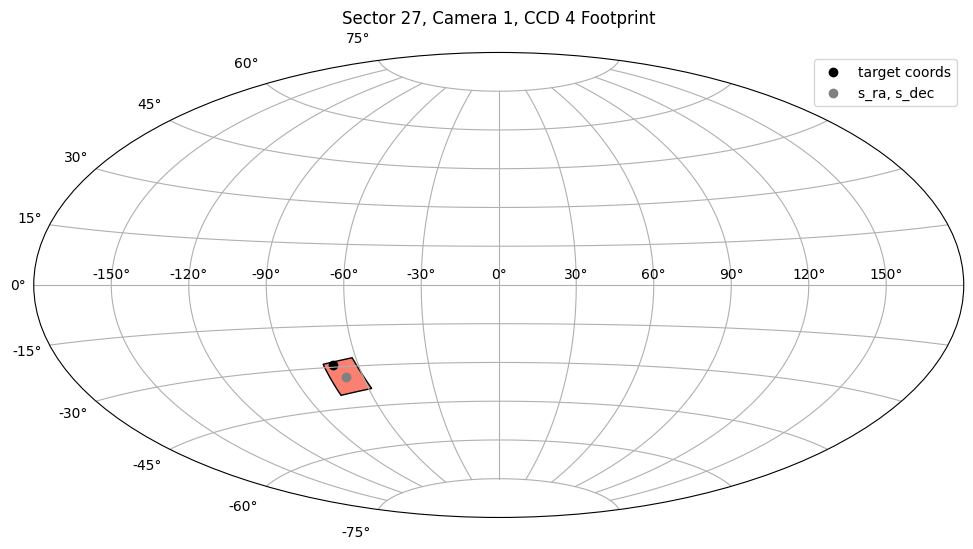
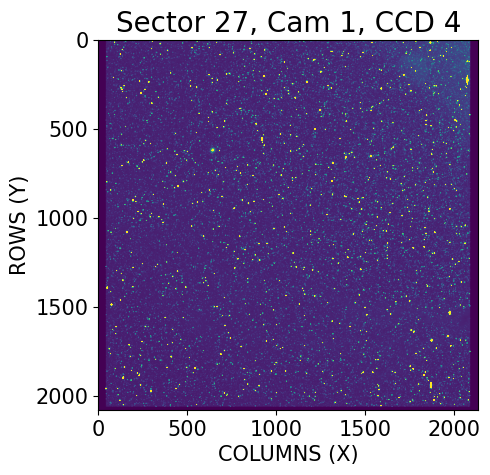
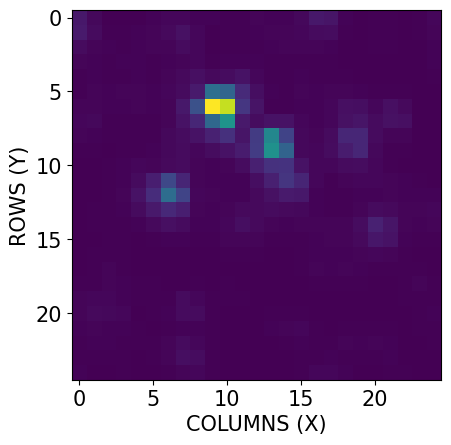
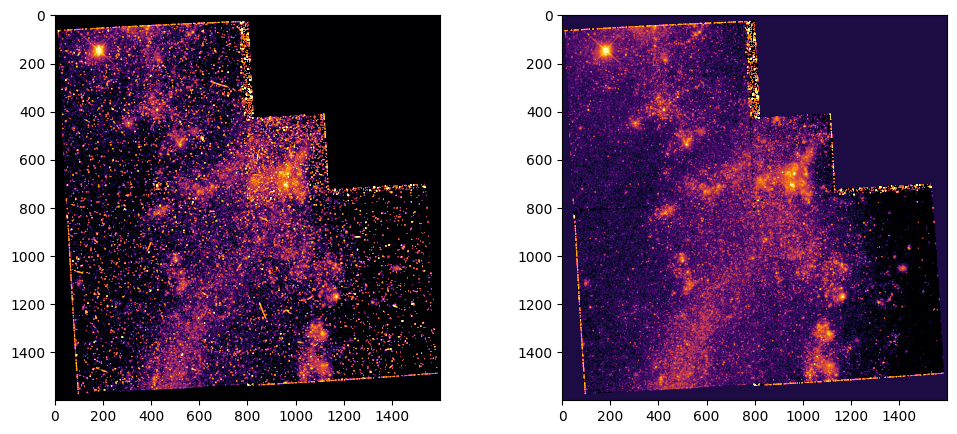
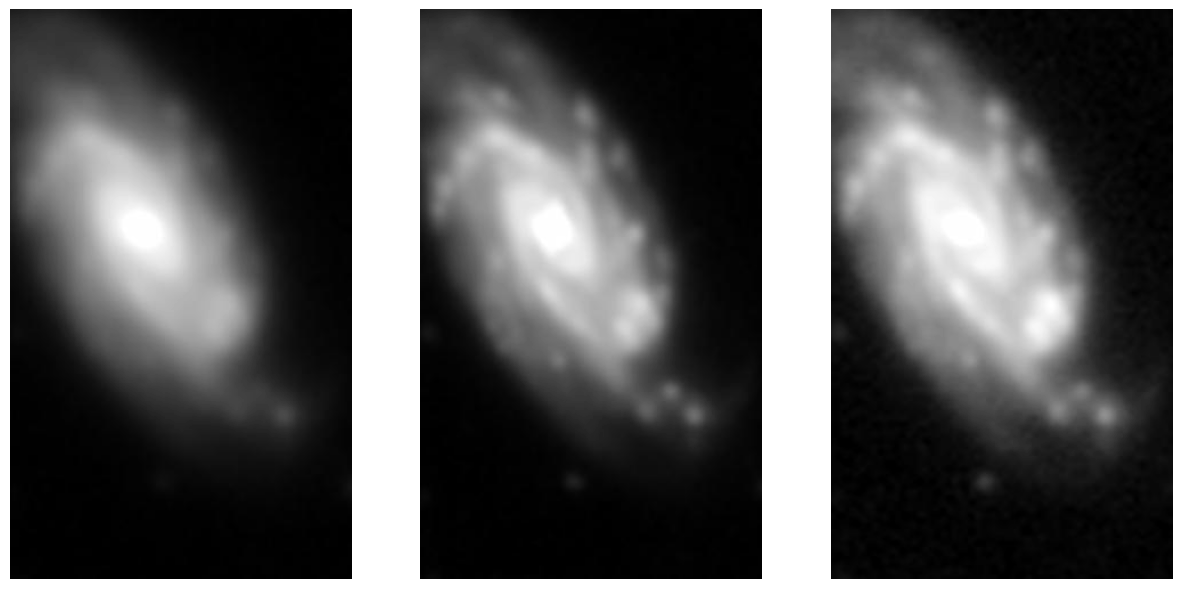
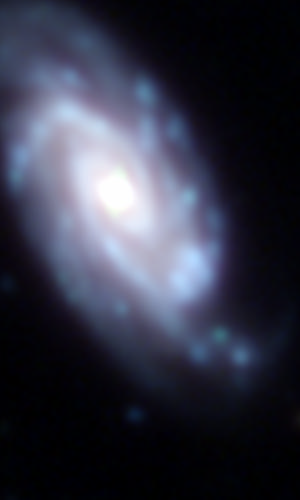
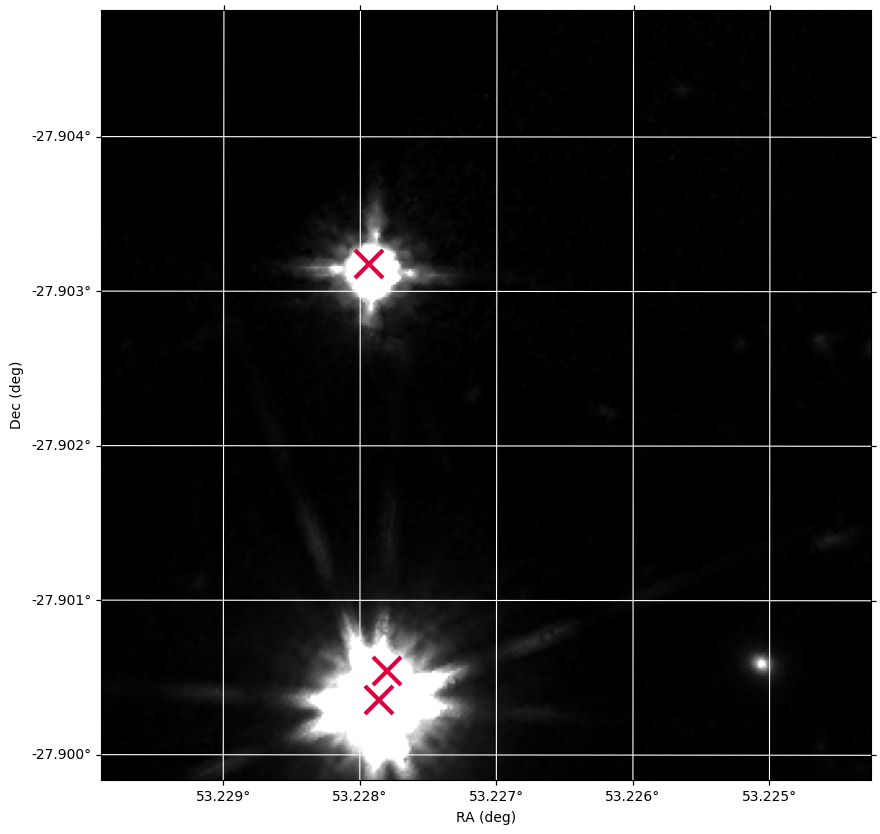

In [16]:
    df["html"] = await df[["nb"]].apply(
        lambda s: from_notebook_node(s["nb"], dict(toc=df.toc.loc[s.name], footer=df.loc[s.name].footer, header=df.loc[s.name].header)), axis=1).gather()
    df.html.head().display.iframe().display()

In [17]:
    readmes = df.groupby(df.target.apath.parent / "index.html").apply(
        (top_toc := lambda x: x.apply(
          lambda y: F"""<li><a href="{relative_path(y.target.parent / "index.html", y.target)}">{y.loc["title"]}</a></li>""", axis=1
        ).pipe(lambda df: "<nav><ul>{}</ul></nav>".format("".join(df.values))))
    ).apply(nbformat.v4.new_markdown_cell).apply(lambda x: nbformat.v4.new_notebook(cells=[x])).to_frame("nb")

In [18]:
    (await readmes.nb.apply(
        from_notebook_node, exporter=(
            toc_exporter := nbconvert.get_exporter("a11y")(
                exclude_input_prompt=True, 
                include_sa11y=False,
                exclude_output_prompt=True,
                exclude_anchor_links=True,
                include_toc=False,
                include_summary=False,
                table_pattern="Region"
            )
        )
    ).gather()).display.iframe().display()

In [19]:
    pandas.Series([nbformat.v4.new_notebook(cells=[nbformat.v4.new_markdown_cell(df.pipe(top_toc))])], index=[target/"index.html"]).apply(
        toc_exporter.from_notebook_node
    ).apply(list).series()[0].display.iframe().display()